# XAI for diabetes prediction

In [2]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=14d812b05de34dd156e33ef7862b3a8c3a1905b3a4aec6cef2407d92f3fe3c78
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


,0
Outcome,
0,"[[Axes(0.125,0.666111;0.215278x0.213889), Axes..."
1,"[[Axes(0.125,0.666111;0.215278x0.213889), Axes..."


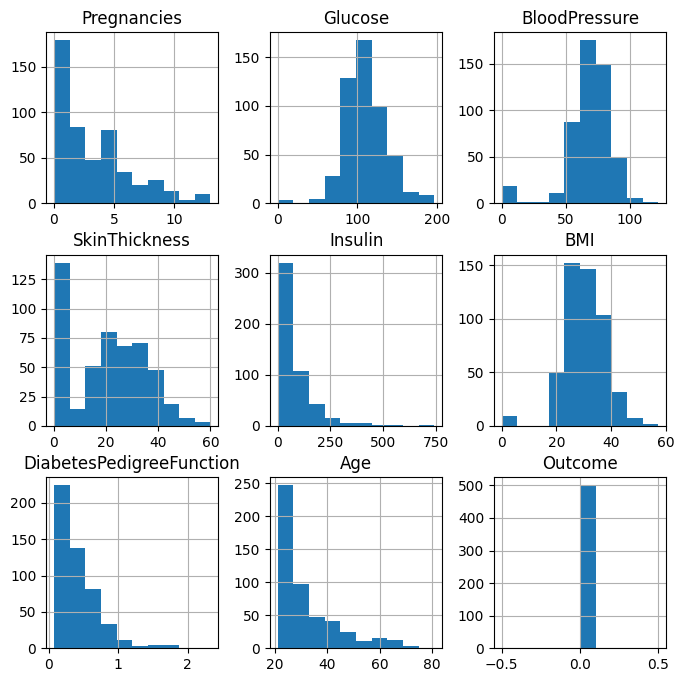

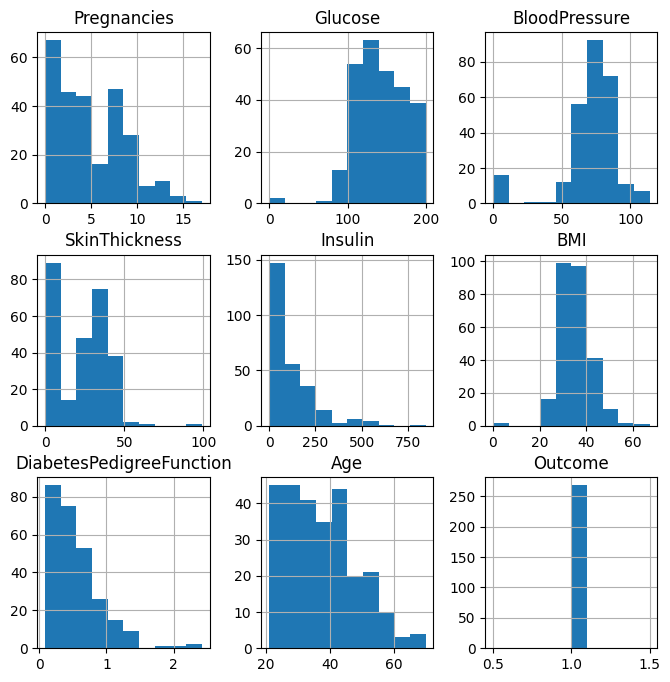

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import lime
#import lime.lime_tabular
from lime import lime_tabular
from lime import submodular_pick

df = pd.read_csv('diabetes.csv')
df.columns

df.head()

df.groupby('Outcome').size()

df.groupby('Outcome').hist(figsize=(8,8))

In [5]:
df.isnull().sum()

print("Total : ", df[df.BloodPressure == 0].shape[0])

print(df[df.BloodPressure == 0].groupby('Outcome')['Age'].count())

print("Total : ", df[df.Glucose == 0].shape[0])

print("Total :" , df[df.SkinThickness == 0].shape[0])

df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)

Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64
Total :  5
Total : 227
(724, 9)


In [6]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df_mod.Outcome, random_state=0)

names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   RF  0.756906
1   GB  0.773481


In [10]:
np.random.seed(123)

predict_fn = lambda x: model.predict_proba(x)

X = df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction','Age']]
X_featurenames = X.columns

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
feature_names=X_featurenames,
class_names=['No Diabetes','Diabetes'],
categorical_features='Outcome',
verbose=True, mode='classification')

# using LIME to get the explanations
i = 0
exp = explainer.explain_instance(df.loc[i,feature_names].astype(int).values, predict_fn, num_features=8)

exp.show_in_notebook(show_table=True)

Intercept 0.28852674612140783
Prediction_local [0.66906475]
Right: 0.30782926432416


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


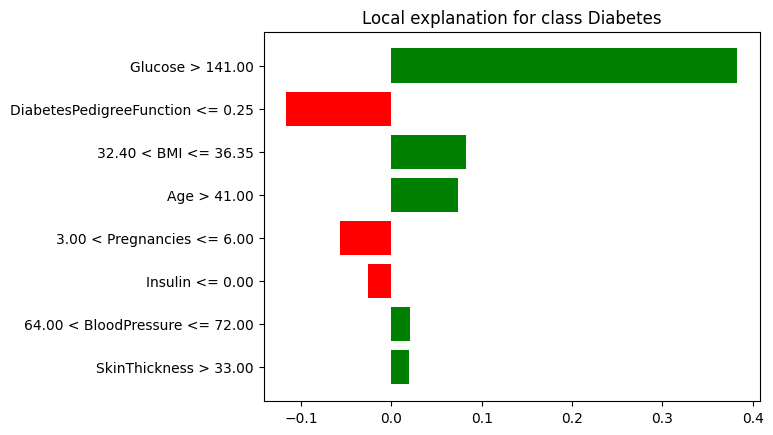

In [11]:
figure = exp.as_pyplot_figure(label = exp.available_labels()[0])